In [63]:
from __future__ import absolute_import, division, print_function, unicode_literals
import pathlib
import os
import PIL
from PIL import Image
import numpy as np


In [64]:
data_root = pathlib.Path("D:\\DL\\flower_photos")

In [66]:
# 从文件夹读取图片和标签到numpy数组中
# 标签信息在文件名中，例如1_40.jpg表示该图片的标签为1
def read_data(data_dir):
    datas = []
    labels = []
    fpaths = []
    for fname in os.listdir(data_dir):
        fpath = os.path.join(data_dir, fname)
        fpaths.append(fpath)
        image = Image.open(fpath)
        data = np.array(image) / 255.0
        label = int(fname.split("_")[0])
        datas.append(data)
        labels.append(label)

    datas = np.array(datas)
    labels = np.array(labels)

    print("shape of datas: {}\tshape of labels: {}".format(datas.shape, 
labels.shape))
    return fpaths, datas, labels


fpaths, datas, labels = read_data(data_root)

shape of datas: (3670,)	shape of labels: (3670,)


In [67]:
datas.shape

(3670,)

In [68]:
labels

array([0, 0, 0, ..., 4, 4, 4])

In [9]:
for item in data_root.iterdir():
  print(item)

C:\Users\qxm\.keras\datasets\flower_photos\daisy
C:\Users\qxm\.keras\datasets\flower_photos\dandelion
C:\Users\qxm\.keras\datasets\flower_photos\LICENSE.txt
C:\Users\qxm\.keras\datasets\flower_photos\roses
C:\Users\qxm\.keras\datasets\flower_photos\sunflowers
C:\Users\qxm\.keras\datasets\flower_photos\tulips


In [12]:
import random
all_image_paths = list(data_root.glob('*/*'))
all_image_paths = [str(path) for path in all_image_paths]

image_count = len(all_image_paths)
image_count

3670

In [13]:
all_image_paths[:10]

['C:\\Users\\qxm\\.keras\\datasets\\flower_photos\\daisy\\100080576_f52e8ee070_n.jpg',
 'C:\\Users\\qxm\\.keras\\datasets\\flower_photos\\daisy\\10140303196_b88d3d6cec.jpg',
 'C:\\Users\\qxm\\.keras\\datasets\\flower_photos\\daisy\\10172379554_b296050f82_n.jpg',
 'C:\\Users\\qxm\\.keras\\datasets\\flower_photos\\daisy\\10172567486_2748826a8b.jpg',
 'C:\\Users\\qxm\\.keras\\datasets\\flower_photos\\daisy\\10172636503_21bededa75_n.jpg',
 'C:\\Users\\qxm\\.keras\\datasets\\flower_photos\\daisy\\102841525_bd6628ae3c.jpg',
 'C:\\Users\\qxm\\.keras\\datasets\\flower_photos\\daisy\\1031799732_e7f4008c03.jpg',
 'C:\\Users\\qxm\\.keras\\datasets\\flower_photos\\daisy\\10391248763_1d16681106_n.jpg',
 'C:\\Users\\qxm\\.keras\\datasets\\flower_photos\\daisy\\10437754174_22ec990b77_m.jpg',
 'C:\\Users\\qxm\\.keras\\datasets\\flower_photos\\daisy\\10437770546_8bb6f7bdd3_m.jpg']

In [14]:
label_names = sorted(item.name for item in data_root.glob('*/') if item.is_dir())
label_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [15]:
label_to_index = dict((name, index) for index, name in enumerate(label_names))
label_to_index

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [16]:
all_image_labels = [label_to_index[pathlib.Path(path).parent.name]
                    for path in all_image_paths]

print("First 10 labels indices: ", all_image_labels[:10])

First 10 labels indices:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [17]:
img_path = all_image_paths[0]
img_path

'C:\\Users\\qxm\\.keras\\datasets\\flower_photos\\daisy\\100080576_f52e8ee070_n.jpg'

In [19]:
import tensorflow as tf
img_raw = tf.io.read_file(img_path)
print(repr(img_raw)[:100]+"...")

<tf.Tensor: id=1, shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x...


In [20]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [21]:
img_tensor = tf.image.decode_image(img_raw)

print(img_tensor.shape)
print(img_tensor.dtype)

(263, 320, 3)
<dtype: 'uint8'>


In [22]:
img_final = tf.image.resize(img_tensor, [192, 192])
img_final = img_final/255.0
print(img_final.shape)
print(img_final.numpy().min())
print(img_final.numpy().max())

(192, 192, 3)
0.0
0.9004912


In [23]:
def preprocess_image(image):
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.resize(image, [192, 192])
  image /= 255.0  # normalize to [0,1] range

  return image

In [24]:
def load_and_preprocess_image(path):
  image = tf.io.read_file(path)
  return preprocess_image(image)

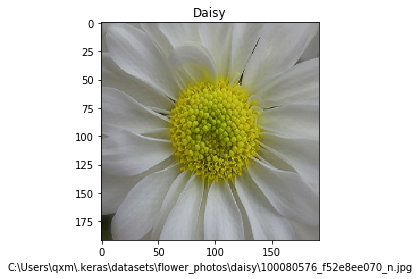

In [27]:
import matplotlib.pyplot as plt

image_path = all_image_paths[0]
label = all_image_labels[0]

plt.imshow(load_and_preprocess_image(img_path))
plt.grid(False)
plt.xlabel(img_path)
plt.title(label_names[label].title())
print()

In [28]:
path_ds = tf.data.Dataset.from_tensor_slices(all_image_paths)

In [29]:
print(path_ds)

<TensorSliceDataset shapes: (), types: tf.string>


In [30]:
image_ds = path_ds.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)

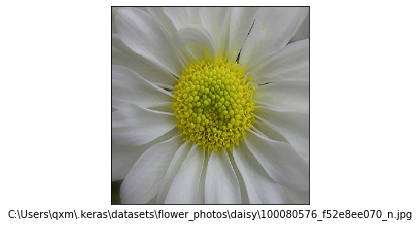

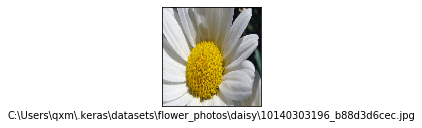

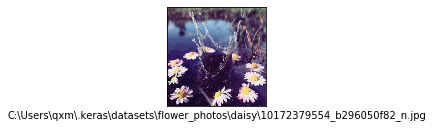

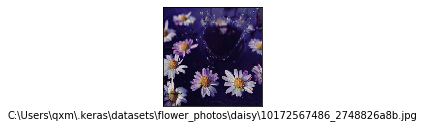

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
for n, image in enumerate(image_ds.take(4)):
  plt.subplot(2,2,n+1)
  plt.imshow(image)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(all_image_paths[n])
  plt.show()

In [32]:
label_ds = tf.data.Dataset.from_tensor_slices(tf.cast(all_image_labels, tf.int64))

In [33]:
for label in label_ds.take(10):
  print(label_names[label.numpy()])

daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy
daisy


In [34]:
image_label_ds = tf.data.Dataset.zip((image_ds, label_ds))

In [39]:
label_ds.shape

AttributeError: 'TensorSliceDataset' object has no attribute 'shape'

In [35]:
print(image_label_ds)

<ZipDataset shapes: ((192, 192, 3), ()), types: (tf.float32, tf.int64)>


In [36]:
ds = tf.data.Dataset.from_tensor_slices((all_image_paths, all_image_labels))

# 元组被解压缩到映射函数的位置参数中
def load_and_preprocess_from_path_label(path, label):
  return load_and_preprocess_image(path), label

image_label_ds = ds.map(load_and_preprocess_from_path_label)
image_label_ds

<MapDataset shapes: ((192, 192, 3), ()), types: (tf.float32, tf.int32)>

In [37]:
BATCH_SIZE = 32

# 设置一个和数据集大小一致的 shuffle buffer size（随机缓冲区大小）以保证数据
# 被充分打乱。
ds = image_label_ds.shuffle(buffer_size=image_count)
ds = ds.repeat()
ds = ds.batch(BATCH_SIZE)
# 当模型在训练的时候，`prefetch` 使数据集在后台取得 batch。
ds = ds.prefetch(buffer_size=AUTOTUNE)
ds

<PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int32)>

In [38]:
ds = image_label_ds.apply(
  tf.data.experimental.shuffle_and_repeat(buffer_size=image_count))
ds = ds.batch(BATCH_SIZE)
ds = ds.prefetch(buffer_size=AUTOTUNE)
ds

Instructions for updating:
Use `tf.data.Dataset.shuffle(buffer_size, seed)` followed by `tf.data.Dataset.repeat(count)`. Static tf.data optimizations will take care of using the fused implementation.


<PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int32)>

In [40]:
image_batch, label_batch = next(iter(ds))

In [42]:
image_batch.shape

TensorShape([32, 192, 192, 3])

In [45]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(192, 192, 3)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [46]:
model.fit(image_batch, label_batch, epochs=5)


Train on 32 samples
Epoch 1/5
32/32 [==============================] - 0s 14ms/sample - loss: 2.8042 - accuracy: 0.0000e+00
Epoch 2/5
32/32 [==============================] - 0s 2ms/sample - loss: 27.3436 - accuracy: 0.3438
Epoch 3/5
32/32 [==============================] - 0s 2ms/sample - loss: 67.6838 - accuracy: 0.2812
Epoch 4/5
32/32 [==============================] - 0s 2ms/sample - loss: 51.7927 - accuracy: 0.1875
Epoch 5/5
32/32 [==============================] - 0s 2ms/sample - loss: 29.1224 - accuracy: 0.2812
